# Preliminary EDA

The purpose of this notebook is to rapidly explore the data, checking for counts, missingness, and get some ideas on preprocessing steps that are needed to be performed to make the data ready for modeling.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling as pp

%matplotlib inline

In [2]:
# load data
df = pd.read_csv('../data/Loan payments data.csv')
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


The info above shows that there are a total of 500 entries for this dataset. From this alone, we can say that generalizing the results of our predicting model outside of this dataset is fairly limited. However, we can use monte carlo methods among others in order to build confidence intervals to estimate range of values for our predictions. This will be explored in a different notebook later on.

Going back to the info, we see that there are two columns with missing data: we have paid_off_time, and past_due_days. We will look into these columns further while we continue our exploration.

## Pandas Profiling
Pandas profiling speeds up EDA by performing some of the basic EDA procedures. In some cases, using pandas profiling alone is sufficient in order to make informed technical decision on what to do next. Let's explore the results from our data.

In [7]:
profile = pp.ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Comments:
1. loan_status - 300 customers paid off their loans, 100 are up for collection and the rest are paid off via collection. We need to explore what collection means.

2. terms - Most terms are either 30 days or 15 days with only 7 cases that are paid in a week.
3. effective_date and due_date - we need to compute the difference in days as it might be another useful variable in determining loan status.
4. paid_off_time - doesn't seem to be quite informative as it has high cardinality (lot of distinct values)
5. education - we need to observe relationship between loan status and education as these are both categorical variables which are not explored by the profiler.

## Preprocessing

In [8]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


### Format date columns

In [9]:
col_dates = ['effective_date', 'due_date', 'paid_off_time']

for col in col_dates:
    df[col] = pd.to_datetime(df[col])
    
    if col=='paid_off_time':
        df['paid_off_date'] = df[col].dt.date

In [12]:
df[col_dates + ['paid_off_date']].head()

,effective_date,due_date,paid_off_time,paid_off_date
0,2016-09-08,2016-10-07,2016-09-14 19:31:00,2016-09-14
1,2016-09-08,2016-10-07,2016-10-07 09:00:00,2016-10-07
2,2016-09-08,2016-10-07,2016-09-25 16:58:00,2016-09-25
3,2016-09-08,2016-09-22,2016-09-22 20:00:00,2016-09-22
4,2016-09-09,2016-10-08,2016-09-23 21:36:00,2016-09-23


In [20]:
df['term_duration'] = (df['due_date'] - df['effective_date']).dt.days
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,paid_off_date,term_duration
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,NaN,45,High School or Below,male,2016-09-14,29
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,NaN,50,Bechalor,female,2016-10-07,29
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,NaN,33,Bechalor,female,2016-09-25,29
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,NaN,27,college,male,2016-09-22,14
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,NaN,28,college,female,2016-09-23,29


### Convert Nominal Variables to Numerical Format

In [31]:
df.loan_status.value_counts()

PAIDOFF               300
COLLECTION            100
COLLECTION_PAIDOFF    100
Name: loan_status, dtype: int64

In [33]:
loan_status_dict = {'PAIDOFF': 0, 'COLLECTION_PAIDOFF': 1, 'COLLECTION': 2}
df['loan_status_num'] = df.loan_status.apply(lambda x: loan_status_dict[x])

In [34]:
df.education.value_counts()

college                 220
High School or Below    209
Bechalor                 67
Master or Above           4
Name: education, dtype: int64

In [35]:
education_dict = {'High School or Below': 0, 'college': 1, 'Bechalor': 2,
                  'Master or Above': 3}
df['education_num'] = df.education.apply(lambda x: education_dict[x])

## Additional EDA

In [27]:
df[df.past_due_days.isna()].loan_status.value_counts()

PAIDOFF    300
Name: loan_status, dtype: int64

We observe that entries with missing values for `past_due_days` are already paid off.

### Correlation/Association Analysis

We now look at the correlations/associations between loan status and each of the variables.

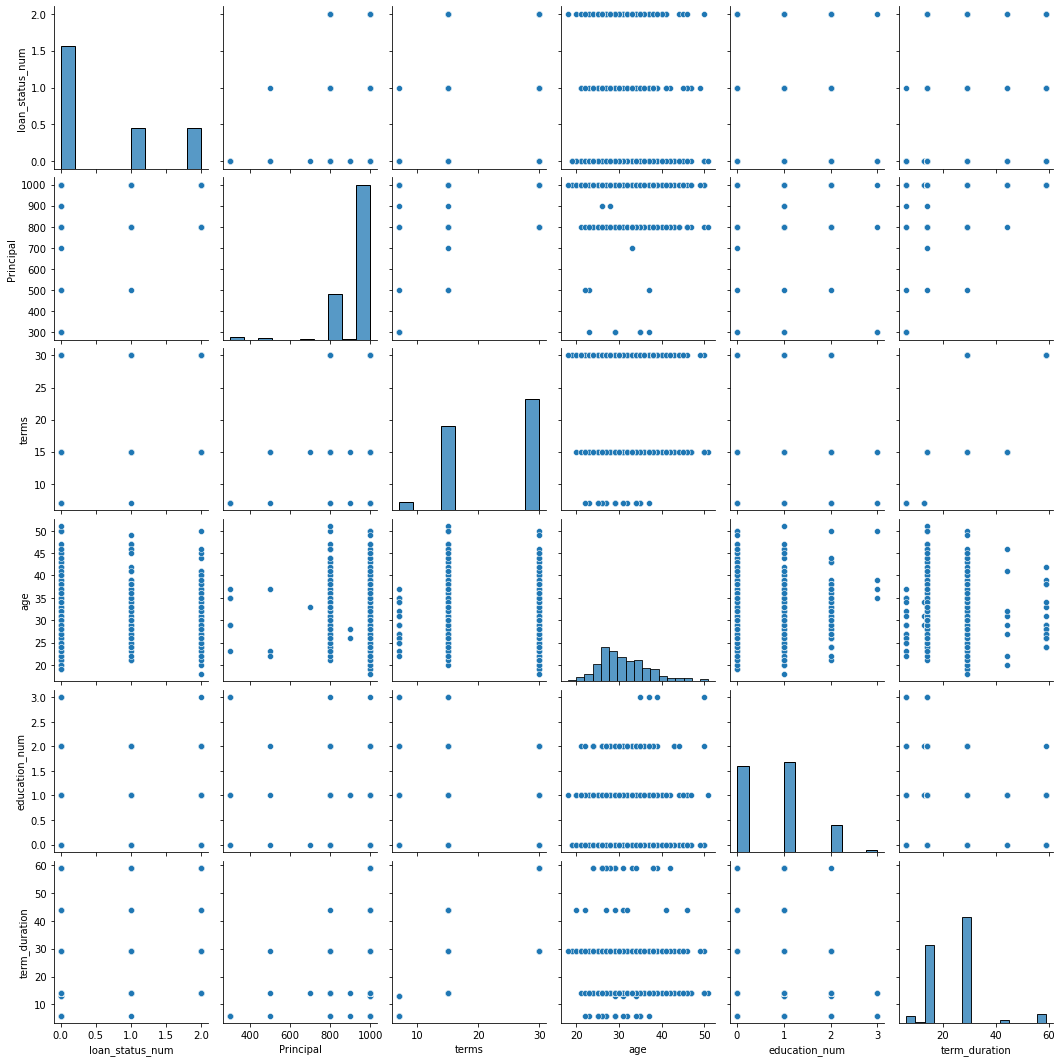

In [38]:
cols = ['loan_status_num', 'Principal', 'terms', 'age',
        'education_num', 'Gender', 'term_duration']

sns.pairplot(df[cols])

#### Education

In [42]:
df.groupby('education')['loan_status'].value_counts(normalize=True)

education             loan_status       
Bechalor              PAIDOFF               0.611940
                      COLLECTION_PAIDOFF    0.223881
                      COLLECTION            0.164179
High School or Below  PAIDOFF               0.588517
                      COLLECTION            0.234450
                      COLLECTION_PAIDOFF    0.177033
Master or Above       PAIDOFF               0.750000
                      COLLECTION            0.250000
college               PAIDOFF               0.604545
                      COLLECTION_PAIDOFF    0.218182
                      COLLECTION            0.177273
Name: loan_status, dtype: float64

We see that education has little effect on loan status. We notice that those with a "Bechalor" or college education has similar proportion while those with `High School or Below` education had less PAIDOFF percentage.

#### Gender

In [44]:
df.groupby('Gender')['loan_status'].value_counts(normalize=True)

Gender  loan_status       
female  PAIDOFF               0.688312
        COLLECTION_PAIDOFF    0.181818
        COLLECTION            0.129870
male    PAIDOFF               0.583924
        COLLECTION            0.212766
        COLLECTION_PAIDOFF    0.203310
Name: loan_status, dtype: float64

For gender, we see that a higher percentage of women paid off their loans on time while more loans went into collection for men.

#### Terms

In [46]:
df.groupby('terms')['loan_status'].value_counts(normalize=True)

terms  loan_status       
7      PAIDOFF               0.952381
       COLLECTION_PAIDOFF    0.047619
15     PAIDOFF               0.613527
       COLLECTION            0.198068
       COLLECTION_PAIDOFF    0.188406
30     PAIDOFF               0.562500
       COLLECTION_PAIDOFF    0.220588
       COLLECTION            0.216912
Name: loan_status, dtype: float64

For terms, we see that the longer the term, it becomes less likely for the loan to be paid off on time.

#### Principal

In [48]:
df.groupby('Principal')['loan_status'].value_counts(normalize=True)

Principal  loan_status       
300        PAIDOFF               1.000000
500        PAIDOFF               0.666667
           COLLECTION_PAIDOFF    0.333333
700        PAIDOFF               1.000000
800        PAIDOFF               0.621622
           COLLECTION            0.207207
           COLLECTION_PAIDOFF    0.171171
900        PAIDOFF               1.000000
1000       PAIDOFF               0.583554
           COLLECTION_PAIDOFF    0.212202
           COLLECTION            0.204244
Name: loan_status, dtype: float64

#### Term Duration

In [49]:
df.groupby('term_duration')['loan_status'].value_counts(normalize=True)

term_duration  loan_status       
6              PAIDOFF               0.944444
               COLLECTION_PAIDOFF    0.055556
13             PAIDOFF               1.000000
14             PAIDOFF               0.636842
               COLLECTION            0.189474
               COLLECTION_PAIDOFF    0.173684
29             PAIDOFF               0.559846
               COLLECTION            0.220077
               COLLECTION_PAIDOFF    0.220077
44             PAIDOFF               0.500000
               COLLECTION            0.250000
               COLLECTION_PAIDOFF    0.250000
59             PAIDOFF               0.454545
               COLLECTION_PAIDOFF    0.318182
               COLLECTION            0.227273
Name: loan_status, dtype: float64

Consistent with the term, the longer the term duration, the higher the proportion of loans that went into collection.

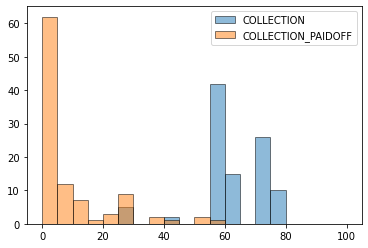

In [78]:
(df.dropna(subset=['past_due_days']).groupby('loan_status')
 .past_due_days.hist(grid=False, alpha=.5, edgecolor='k', legend=True,
                     bins=np.arange(21)*5));

The plot above shows that collection becomes harder the longer the time passes after due date. As a recommendation, collection should be done as early as possible to reduce chances of unpaid loans.

## Modeling Recommendation

Given our analysis above, we got some initial ideas on which variables affect whether or not loans are paid on time. Note that some variables will cause `model leakage` if used in predicting on time payment or not. Specifically, we cannot use `past_due_days` as it clearly gives us an idea on which loans were paid on time (those with NAs).

Hence, we will use the following variables as predictors:

1. Principal
2. term
3. age
4. education
5. Gender
6. term_duration